# Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.# 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('POPULATION,DATASET.csv')

In [10]:
data.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,COUNTRY,Country,DAGEGR,Age groups,DSEX,Gender,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_RPOP(1.0),Total population by sex and age,I,AUS,Australia,1111,11 years,90,Total males+females,...,276035.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD:DF_RPOP(1.0),Total population by sex and age,I,AUS,Australia,1010,10 years,1,Males,...,138989.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD:DF_RPOP(1.0),Total population by sex and age,I,AUS,Australia,1010,10 years,2,Females,...,132427.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD:DF_RPOP(1.0),Total population by sex and age,I,AUS,Australia,1010,10 years,90,Total males+females,...,271416.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD:DF_RPOP(1.0),Total population by sex and age,I,AUS,Australia,1014,10-14 years,1,Males,...,708804.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
gender_data = data[data['Gender'].isin(['Males', 'Females'])].groupby('Gender')['OBS_VALUE'].sum()

In [13]:
age_data = data[data['Age groups'].str.isnumeric()]

# Bar graph representation

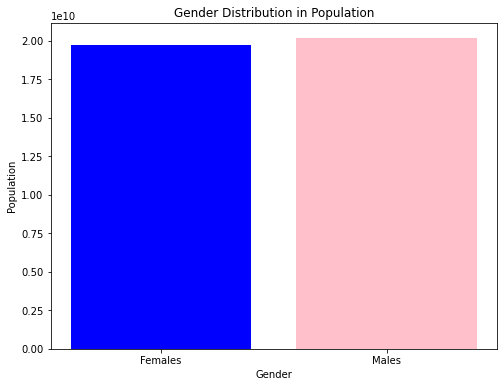

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(gender_data.index, gender_data.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Population')
plt.title('Gender Distribution in Population')
plt.show()

In [22]:
age_data = data[pd.to_numeric(data['Age groups'], errors='coerce').notnull()]

In [23]:
age_data['Age groups'] = age_data['Age groups'].astype(int)
age_data = age_data.sort_values('Age groups')

In [24]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
colors = plt.cm.viridis(np.linspace(0, 1, len(bins)-1))

In [25]:
age_data['Age Range'] = pd.cut(age_data['Age groups'], bins=bins, labels=labels, right=False)

# histogram representation

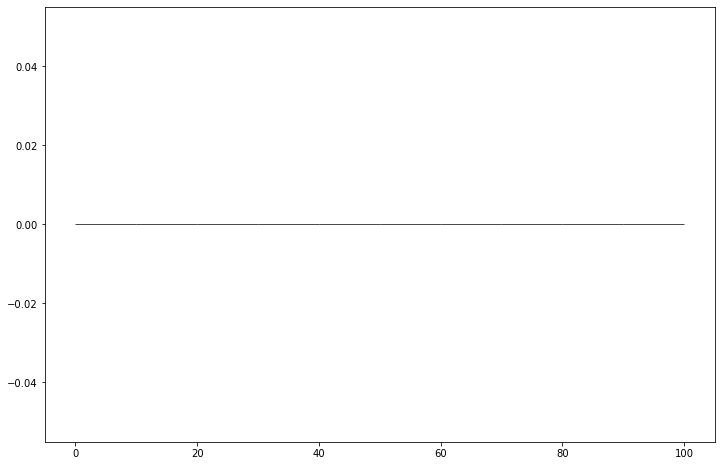

In [30]:
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(age_data['OBS_VALUE'], bins=bins, edgecolor='black', alpha=0.7)

In [31]:
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

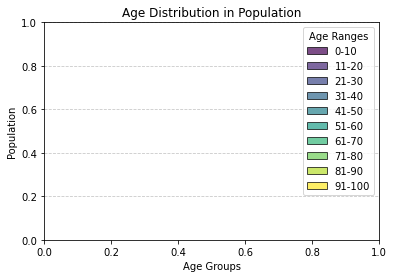

In [32]:
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Age Distribution in Population')
plt.legend(handles=patches, labels=labels, title='Age Ranges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()